In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_file_path = 'continuous_factory_process.csv'
df = pd.read_csv(csv_file_path)

In [9]:
machine_names = df.columns[df.columns.str.startswith('Machine')].str.split('.').str[0].unique()

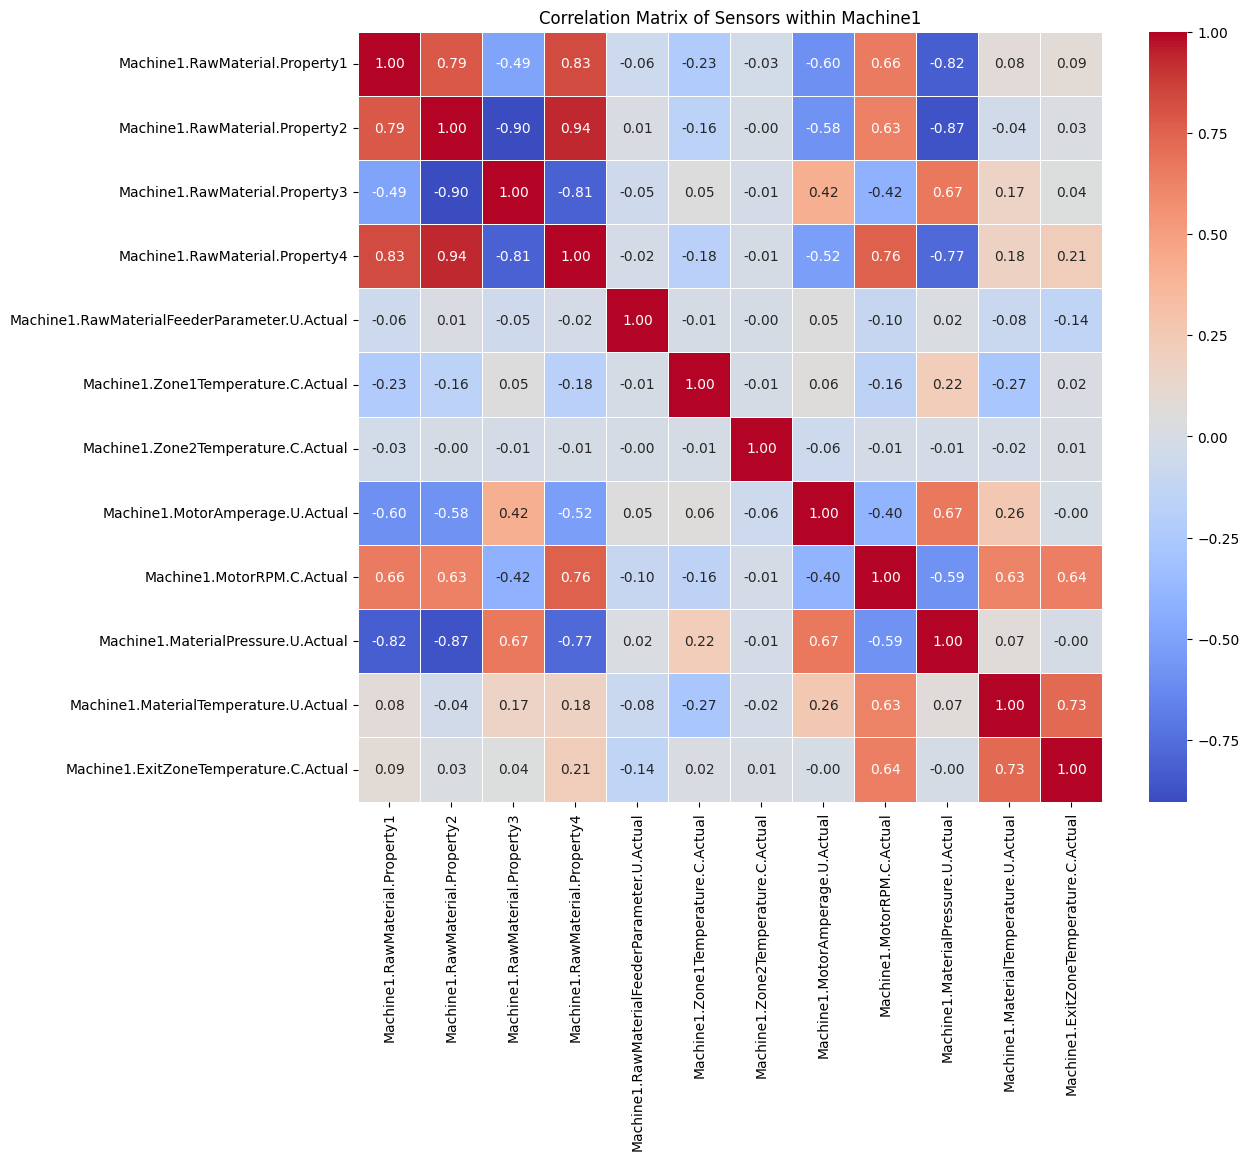

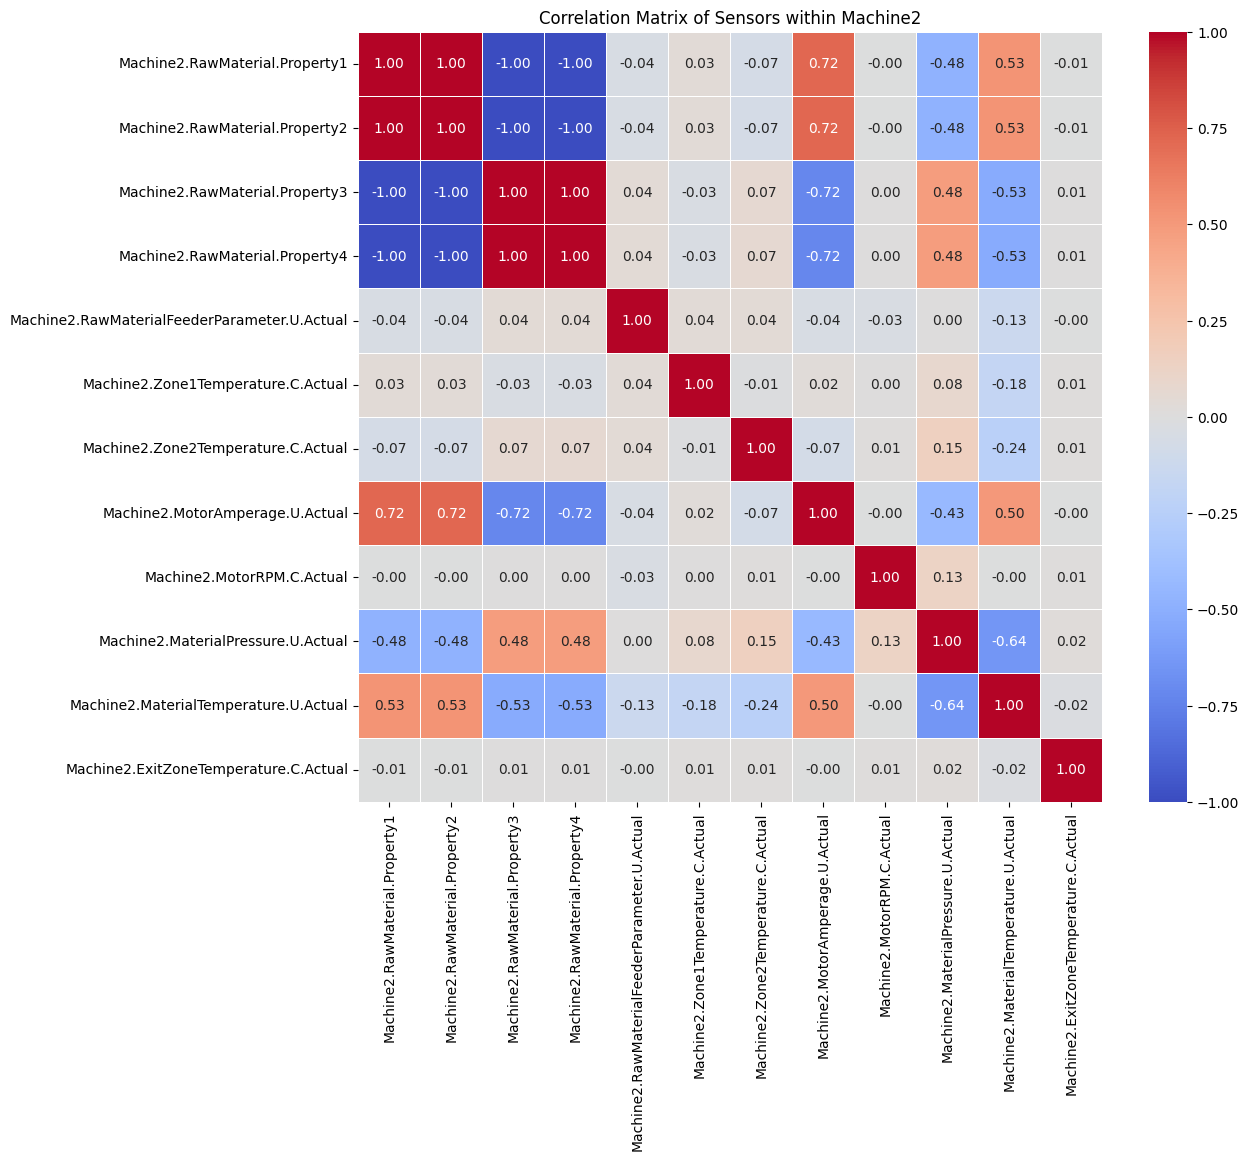

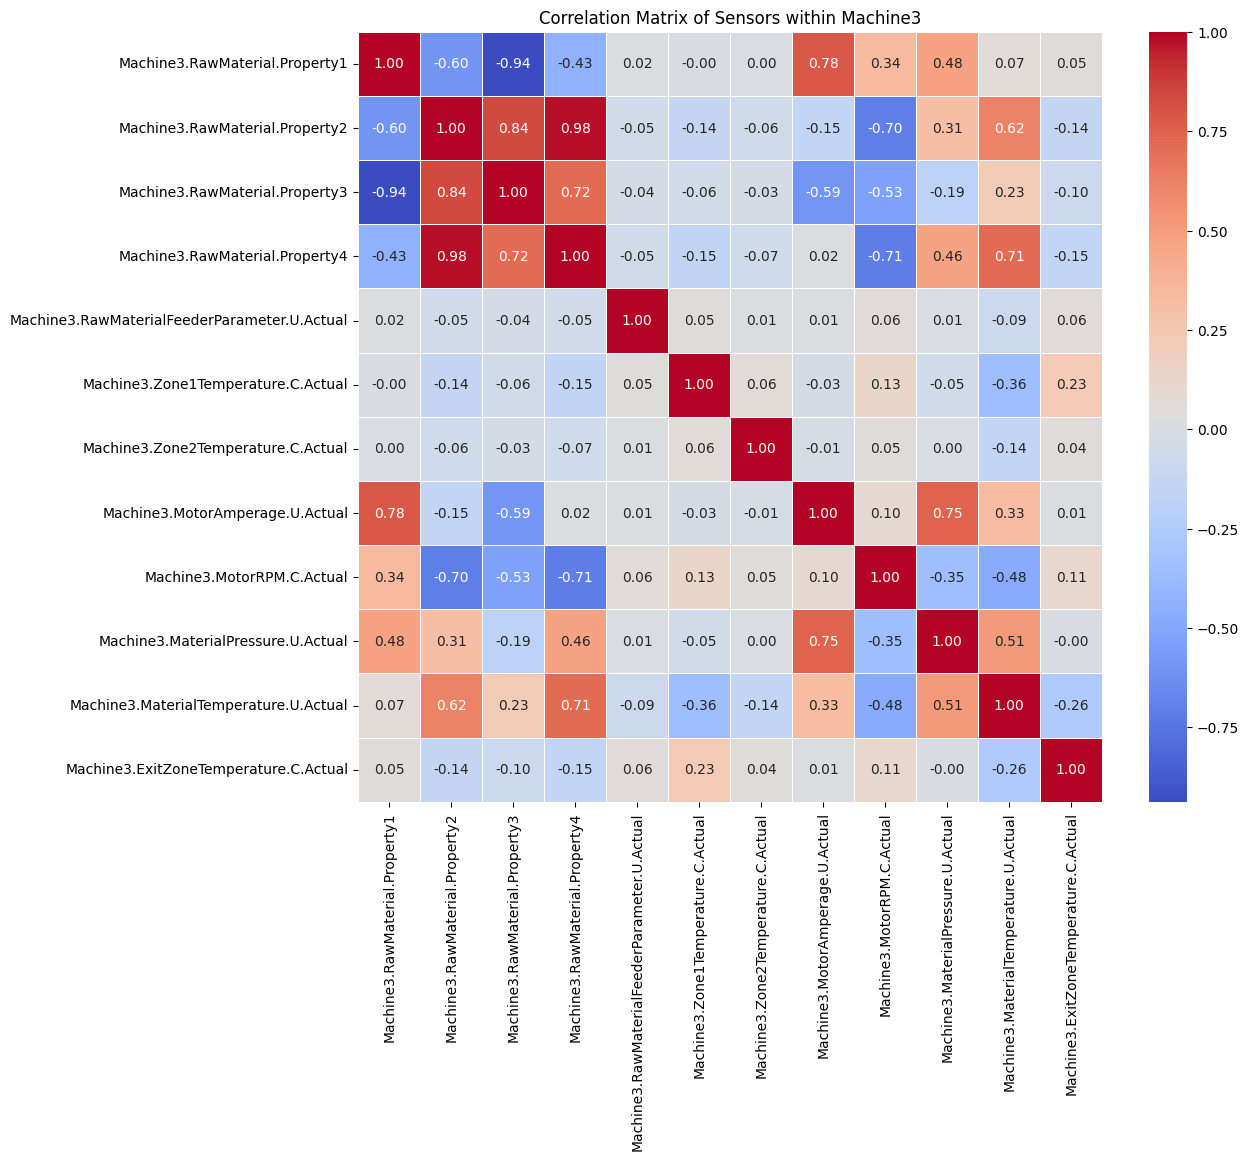

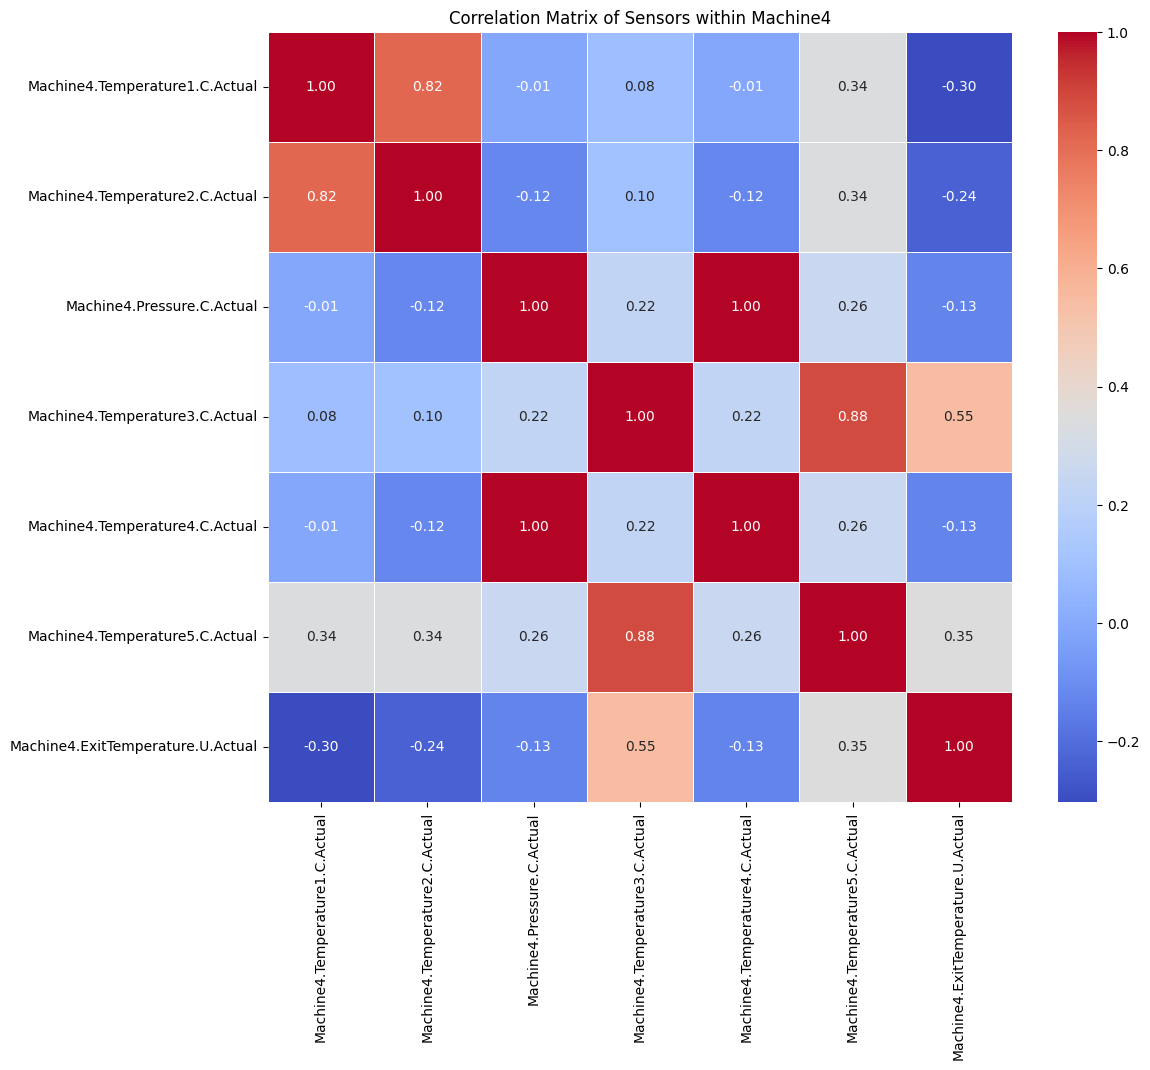

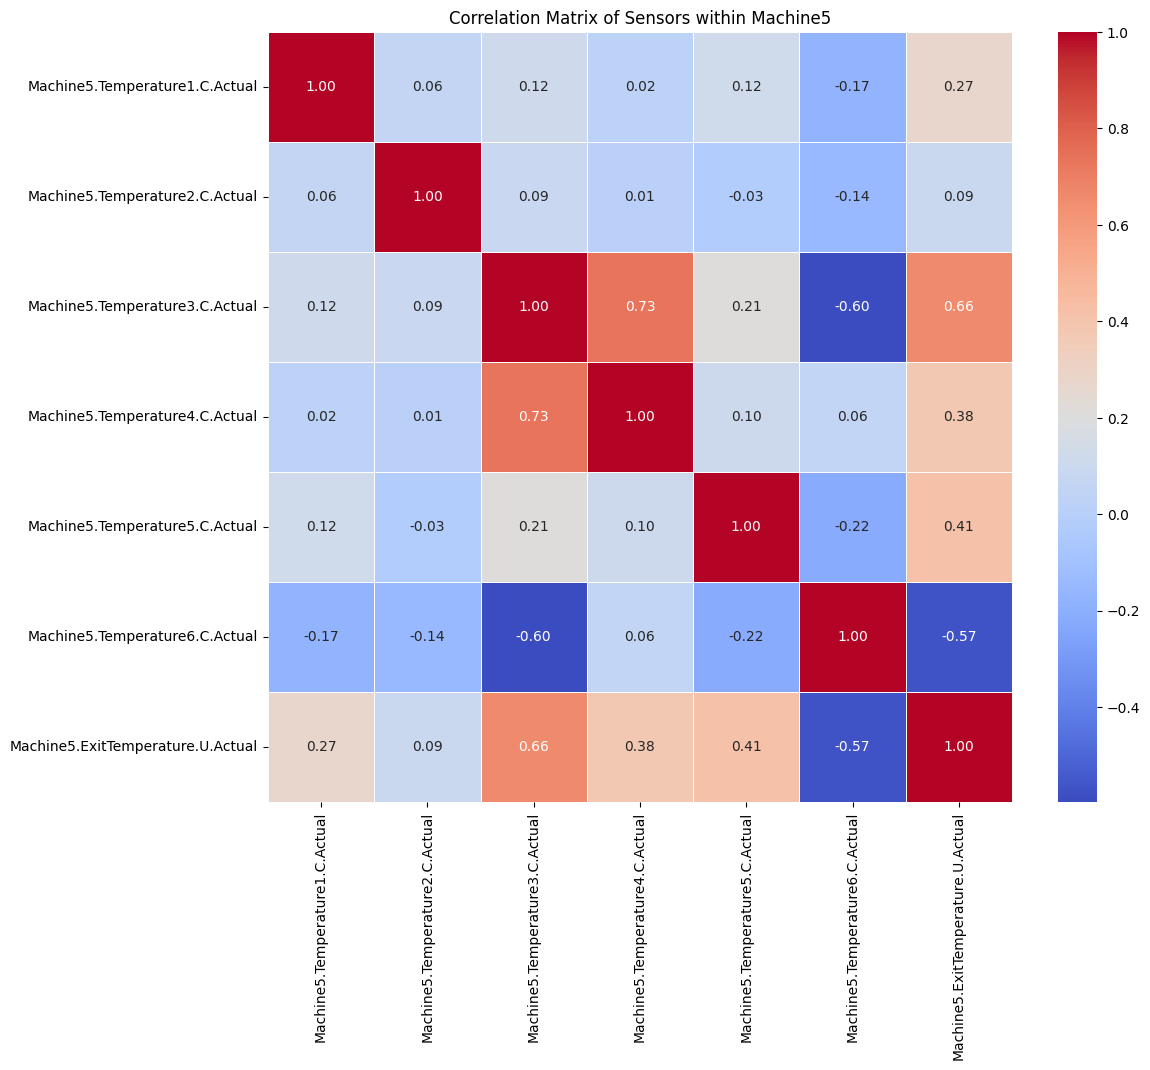

In [10]:
for machine_name in machine_names:
    # Filter columns for the current machine
    machine_columns = [col for col in df.columns if col.startswith(f'{machine_name}.')]
    df_machine = df[machine_columns]
    
    # Calculate correlation matrix
    correlation_matrix = df_machine.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title(f'Correlation Matrix of Sensors within {machine_name}')
    plt.show()

In [11]:
print(f'Correlation Matrix for {machine_name}:\n{correlation_matrix}')


Correlation Matrix for Machine5:
                                   Machine5.Temperature1.C.Actual  \
Machine5.Temperature1.C.Actual                           1.000000   
Machine5.Temperature2.C.Actual                           0.058399   
Machine5.Temperature3.C.Actual                           0.118166   
Machine5.Temperature4.C.Actual                           0.022976   
Machine5.Temperature5.C.Actual                           0.124215   
Machine5.Temperature6.C.Actual                          -0.174276   
Machine5.ExitTemperature.U.Actual                        0.274446   

                                   Machine5.Temperature2.C.Actual  \
Machine5.Temperature1.C.Actual                           0.058399   
Machine5.Temperature2.C.Actual                           1.000000   
Machine5.Temperature3.C.Actual                           0.087124   
Machine5.Temperature4.C.Actual                           0.009114   
Machine5.Temperature5.C.Actual                          -0.025489   


In [14]:
correlation_threshold = 0.5

In [15]:
for machine_name in machine_names:
    # Filter columns for the current machine
    machine_columns = [col for col in df.columns if col.startswith(f'{machine_name}.')]
    df_machine = df[machine_columns]
    
    # Calculate correlation matrix
    correlation_matrix = df_machine.corr()

    # Print correlation information
    print(f'\nCorrelation Information for {machine_name}:')
    for sensor1 in correlation_matrix.columns:
        for sensor2 in correlation_matrix.index:
            if sensor1 != sensor2:  # Avoid self-correlation
                correlation_value = correlation_matrix.loc[sensor1, sensor2]
                if abs(correlation_value) > correlation_threshold:
                    print(f'{sensor1} and {sensor2}: {correlation_value:.2f} (Most likely a correlation)')
                else:
                    print(f'{sensor1} and {sensor2}: {correlation_value:.2f}')


Correlation Information for Machine1:
Machine1.RawMaterial.Property1 and Machine1.RawMaterial.Property2: 0.79 (Most likely a correlation)
Machine1.RawMaterial.Property1 and Machine1.RawMaterial.Property3: -0.49
Machine1.RawMaterial.Property1 and Machine1.RawMaterial.Property4: 0.83 (Most likely a correlation)
Machine1.RawMaterial.Property1 and Machine1.RawMaterialFeederParameter.U.Actual: -0.06
Machine1.RawMaterial.Property1 and Machine1.Zone1Temperature.C.Actual: -0.23
Machine1.RawMaterial.Property1 and Machine1.Zone2Temperature.C.Actual: -0.03
Machine1.RawMaterial.Property1 and Machine1.MotorAmperage.U.Actual: -0.60 (Most likely a correlation)
Machine1.RawMaterial.Property1 and Machine1.MotorRPM.C.Actual: 0.66 (Most likely a correlation)
Machine1.RawMaterial.Property1 and Machine1.MaterialPressure.U.Actual: -0.82 (Most likely a correlation)
Machine1.RawMaterial.Property1 and Machine1.MaterialTemperature.U.Actual: 0.08
Machine1.RawMaterial.Property1 and Machine1.ExitZoneTemperature.C